### Insurance expenses prediction.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm


from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
%matplotlib inline

In [2]:
#Load data
insure_df = pd.read_csv('insurance.csv')

insure_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


#### EDA

In [3]:
insure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observations : 1338 non null values in 6 columns

In [4]:
insure_df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


<AxesSubplot:xlabel='age', ylabel='expenses'>

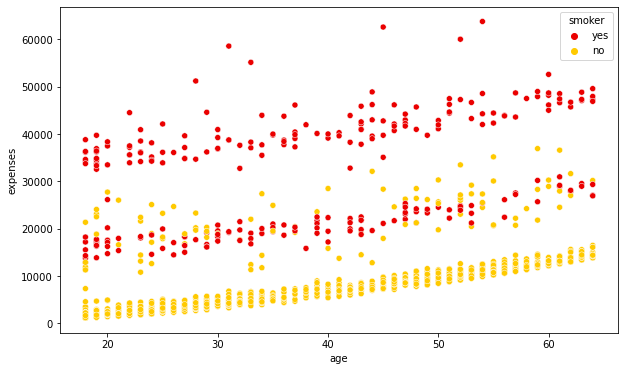

In [5]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = insure_df['age'], y = insure_df['expenses'], hue = insure_df['smoker'], palette = 'hot')

#There is smoker in teen age itself and the smoker are comparitively have high insurance price among all ages

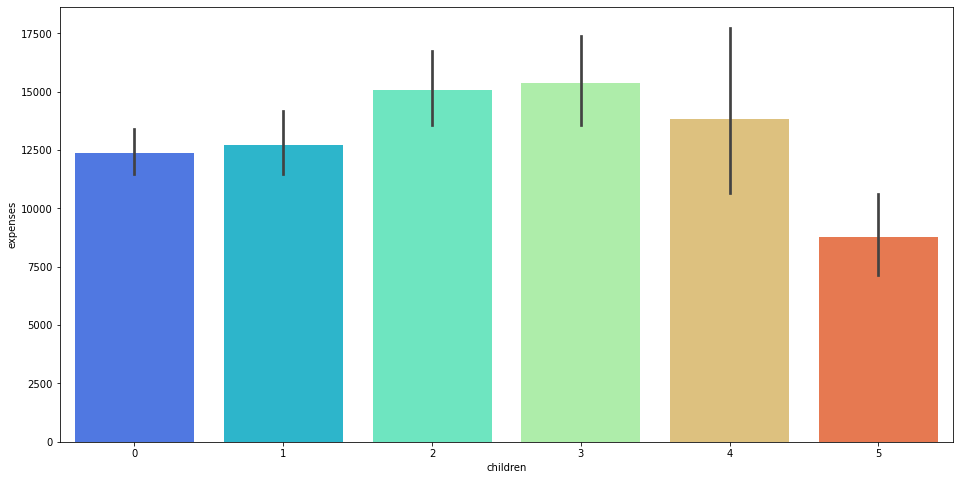

In [6]:
plt.figure(figsize = (16,8))
sns.barplot(x = insure_df['children'], y = insure_df['expenses'], palette = 'rainbow');
#It's quite interesting people with 5 children have less insurance expenses

In [7]:
insure_df.groupby(['region'])['expenses'].sum()

region
northeast    4343668.64
northwest    4035711.93
southeast    5363689.80
southwest    4012754.82
Name: expenses, dtype: float64

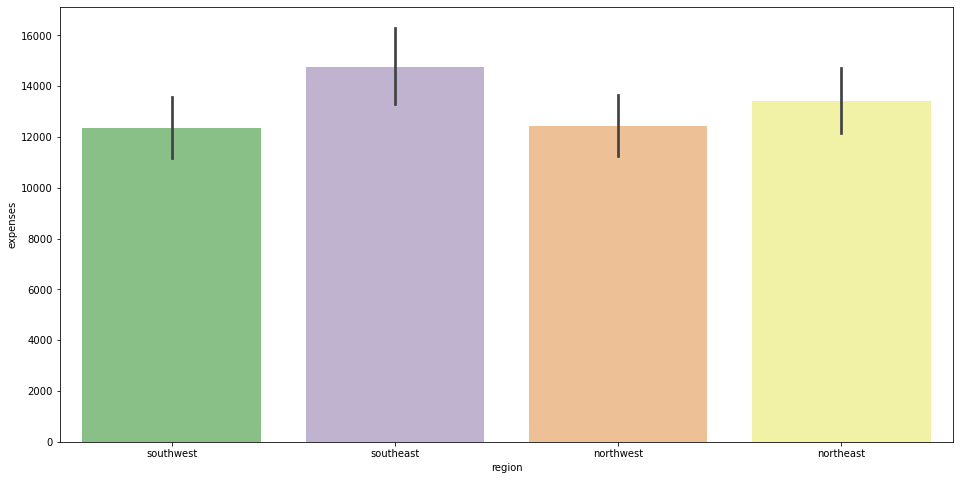

In [8]:
plt.figure(figsize = (16,8))
sns.barplot(x = insure_df['region'], y = insure_df['expenses'], palette = 'Accent');
#Southeast people have more insurance expenses

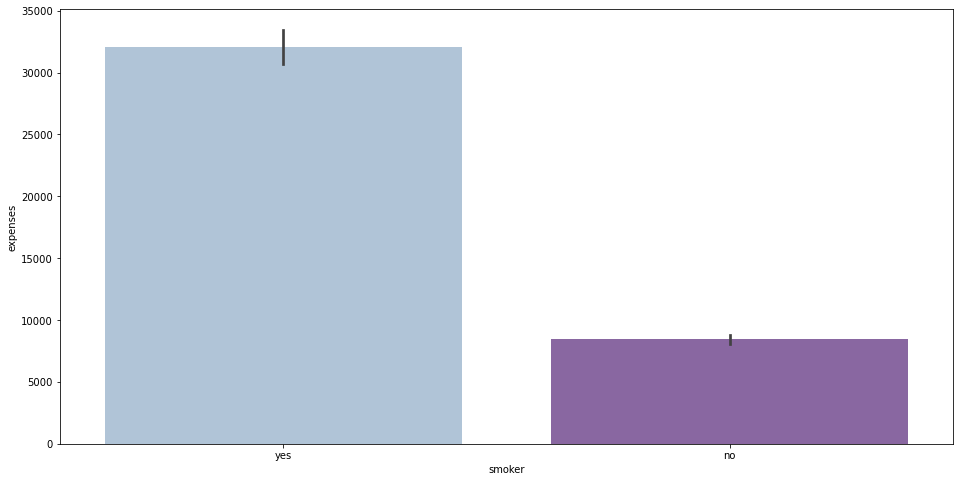

In [88]:
plt.figure(figsize = (16,8))
sns.barplot(x = insure_df['smoker'], y = insure_df['expenses'], palette = 'BuPu');
#Smoker people have more insurance expenses

<AxesSubplot:>

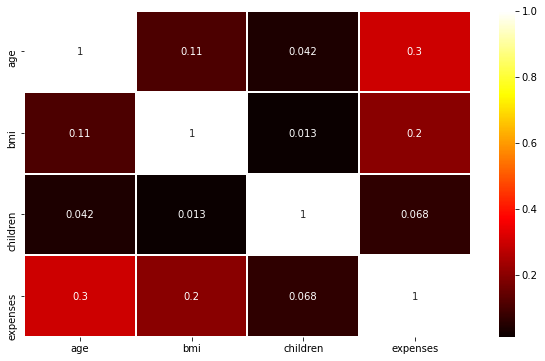

In [90]:
corr = insure_df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, linewidths = 1.0, cmap = 'hot')

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

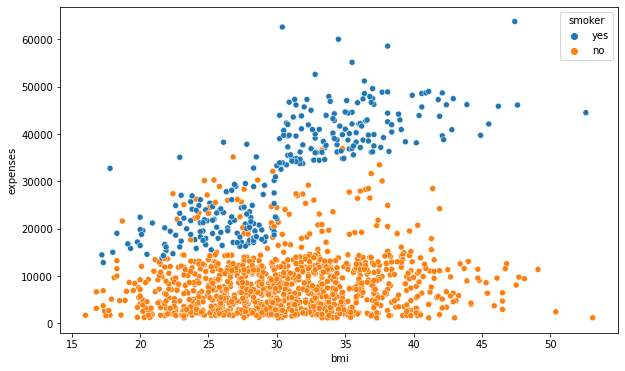

In [74]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = insure_df['bmi'] , y = insure_df ['expenses'], hue = insure_df ['smoker'])
#if bmi is low then insurance expenses is low for non - smoker

### Encoding

In [9]:
#Encoding Categorical variable 
df = pd.get_dummies(insure_df, drop_first = True)

In [10]:
df.columns

Index(['age', 'bmi', 'children', 'expenses', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [11]:
X = df.drop(['expenses'], axis = 1)

In [12]:
y = df['expenses']

### Train and Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
test_pre = lm.predict(X_test)

train_pred = lm.predict(X_train)

<AxesSubplot:ylabel='Density'>

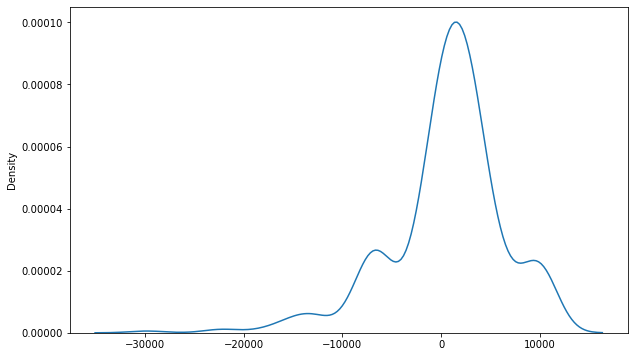

In [17]:
plt.figure(figsize = (10,6))
sns.kdeplot(test_pre - np.array(y_test))
#Residuals follow normal distribution

<AxesSubplot:ylabel='Density'>

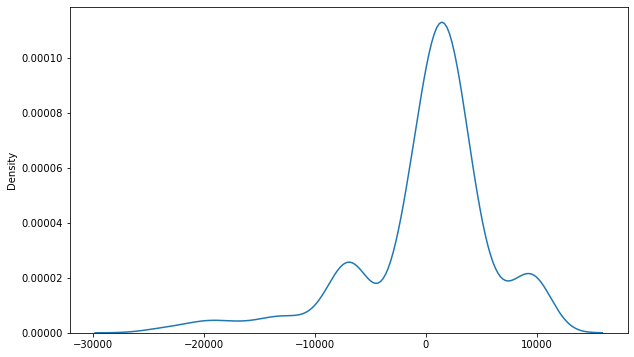

In [19]:
plt.figure(figsize = (10,6))
sns.kdeplot(train_pred - np.array(y_train))
#Residuals follow normal distribution

### Homoscedasticity 

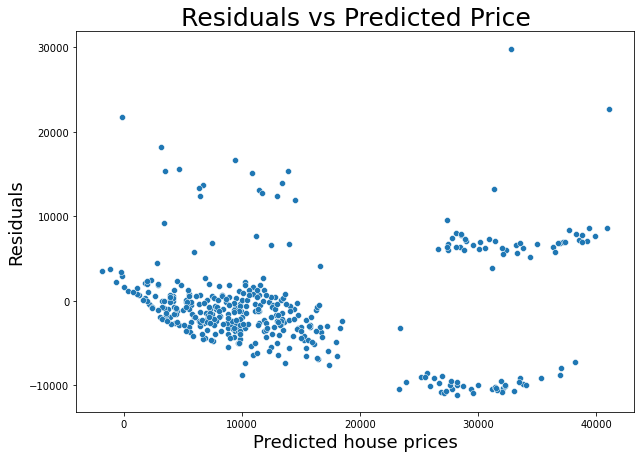

In [118]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs Predicted Price",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
sns.scatterplot(x = test_pre, y = y_test - test_pre);

In [115]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pre))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pre))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pre)))

print('Test R2: ', metrics.r2_score(y_test, test_pre))

Train MAE:  4260.9776318596105
Train MSE:  37683752.77255582
Train RSME:  6138.7093735211
Train R2:  0.7455824800587142
-------------------------------
Test MAE:  4195.915154310768
Test MSE:  33886312.79456486
Test RSME:  5821.195134554833
Test R2:  0.762800450334816


#### Ordinary Least Square Stats

In [120]:
reg = sm.OLS(y, X).fit()

In [121]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               expenses   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              1158.
Date:                Tue, 16 Mar 2021   Prob (F-statistic):                        0.00
Time:                        19:31:31   Log-Likelihood:                         -13618.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1330   BIC:                                  2.729e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                202.9839     11.620     17.469      0.000     180.189     225.779
bmi                 69.3184     18.814      3.684      0.000      32.410     106.227
children           289.0487    144.210      2.004      0.045       6.144     571.953
sex_male          -665.7681    347.527     -1.916      0.056   -1347.528      15.992
smoker_yes        2.337e+04    433.141     53.965      0.000    2.25e+04    2.42e+04
region_northwest -1736.3234    486.878     -3.566      0.000   -2691.456    -781.191
region_southeast -1282.3217    503.665     -2.546      0.011   -2270.386    -294.257
region_southwest -1950.2315    495.855     -3.933      0.000   -2922.976    -977.487
==============================================================================
Omnibus:                      275.165   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              643.067
Skew:                           1.123   Prob(JB):                    2.29e-140
Kurtosis:                       5.548   Cond. No.                         206.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :
* All P-values are falling in level of significance area, so we reject null hypothesis i.e all variable add significance to predict insurance expenses

* Durbin-Watson test values states that there is no auto-correlation between data	

### KNN

Train MAE:  6269.579440170941
Train MSE:  84254134.06612967
Train RSME:  9179.005069512146
Train R2:  0.43116791039143954
_ __ __ __ __ __ __ __ __ __ __ _
Test MAE:  8168.9702039800995
Test MSE:  132165687.82748337
Test RSME:  11496.333668934778
Test R2:  0.07485828204664957


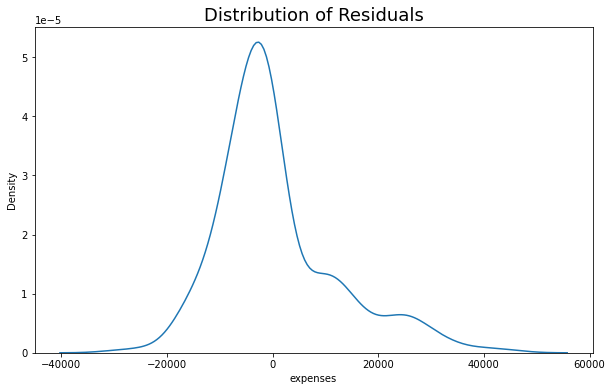

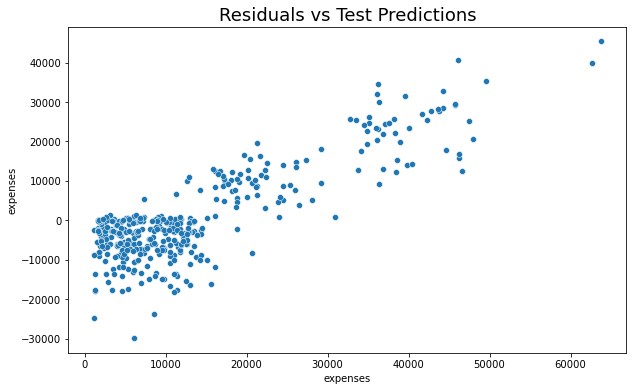

In [9]:
model = KNeighborsRegressor()

model.fit(X_train, y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('_ _'*11)

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

#Normality
plt.figure(figsize=(10,6))
sns.kdeplot(y_test-test_pred)
plt.title('Distribution of Residuals', fontsize = 18)
#errors are following the normality in residuals
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x = y_test, y = y_test-test_pred)
plt.title('Residuals vs Test Predictions', fontsize = 18)
#Residuals scatters around the zero
plt.show()

### Decision Tree

Train MAE:  13.356004273504274
Train MSE:  83483.17387200857
Train RSME:  288.934549460615
Train R2:  0.9994363729594147
_ __ __ __ __ __ __ __ __ __ __ _
Test MAE:  3280.0932587064676
Test MSE:  45197091.23094601
Test RSME:  6722.878195456617
Test R2:  0.683626550012955


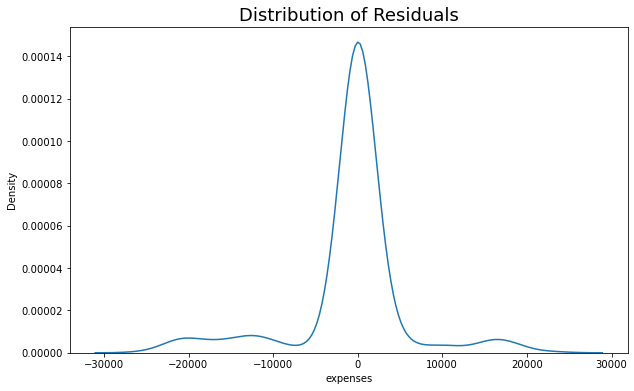

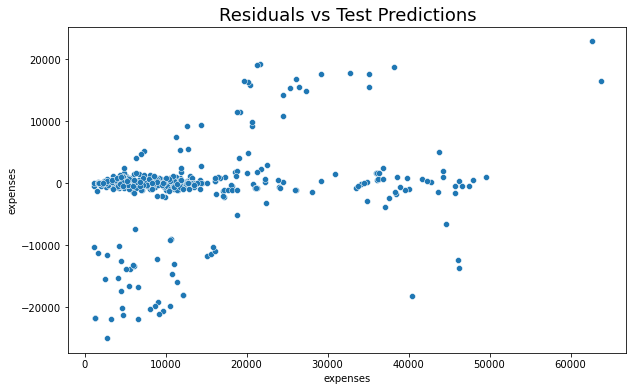

In [10]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('_ _'*11)

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

#Normality
plt.figure(figsize=(10,6))
sns.kdeplot(y_test-test_pred)
plt.title('Distribution of Residuals', fontsize = 18)
#errors are following the normality in residuals
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x = y_test, y = y_test-test_pred)
plt.title('Residuals vs Test Predictions', fontsize = 18)
#Residuals scatters around the zero
plt.show()

### Bagging

Train MAE:  1091.0123226495725
Train MSE:  4283496.265909559
Train RSME:  2069.660906020491
Train R2:  0.9710804679346018
_ __ __ __ __ __ __ __ __ __ __ _
Test MAE:  2880.950773631841
Test MSE:  23350320.884971447
Test RSME:  4832.216974119793
Test R2:  0.8365509510571143


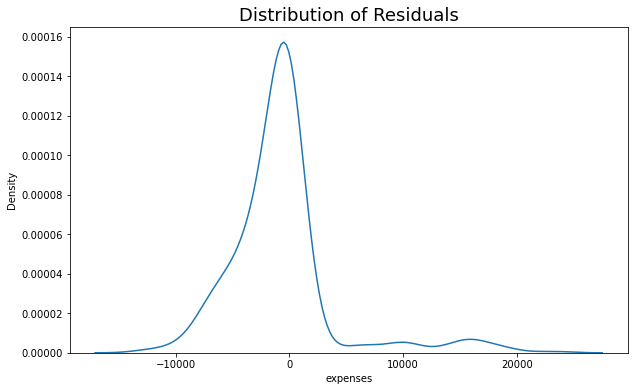

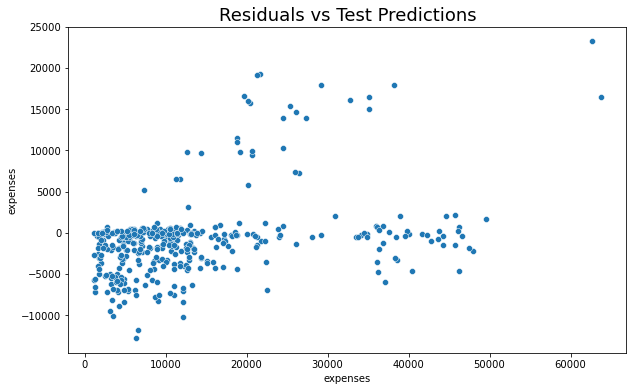

In [11]:
model = BaggingRegressor()

model.fit(X_train, y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('_ _'*11)

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

#Normality
plt.figure(figsize=(10,6))
sns.kdeplot(y_test-test_pred)
plt.title('Distribution of Residuals', fontsize = 18)
#errors are following the normality in residuals
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x = y_test, y = y_test-test_pred)
plt.title('Residuals vs Test Predictions', fontsize = 18)
#Residuals scatters around the zero
plt.show()

### Random Forest

Train MAE:  1038.6770871082624
Train MSE:  3706200.663428063
Train RSME:  1925.1495171617355
Train R2:  0.9749780127556504
_ __ __ __ __ __ __ __ __ __ __ _
Test MAE:  2651.661546600331
Test MSE:  20039205.94928625
Test RSME:  4476.517167317272
Test R2:  0.8597283022311897


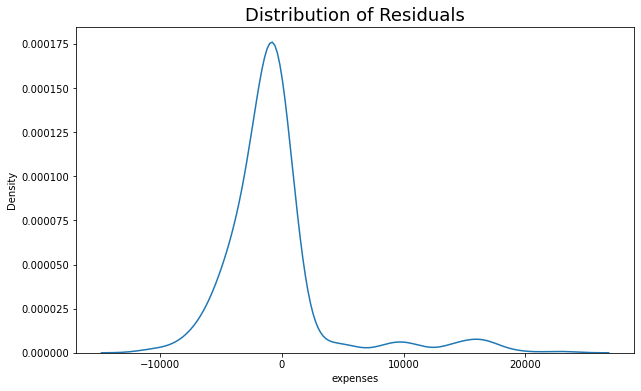

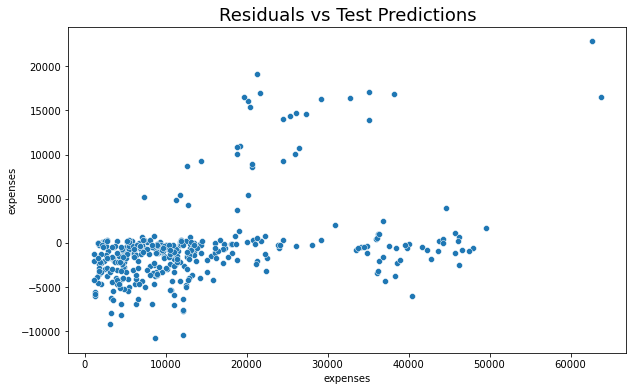

In [12]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('_ _'*11)

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

#Normality
plt.figure(figsize=(10,6))
sns.kdeplot(y_test-test_pred)
plt.title('Distribution of Residuals', fontsize = 18)
#errors are following the normality in residuals
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x = y_test, y = y_test-test_pred)
plt.title('Residuals vs Test Predictions', fontsize = 18)
#Residuals scatters around the zero
plt.show()

### ADA Boost

Train MAE:  4105.046962742914
Train MSE:  26159451.327717822
Train RSME:  5114.631103776481
Train R2:  0.8233874749685299
_ __ __ __ __ __ __ __ __ __ __ _
Test MAE:  3895.9196693604235
Test MSE:  22679866.99827251
Test RSME:  4762.338396026947
Test R2:  0.8412440364618435


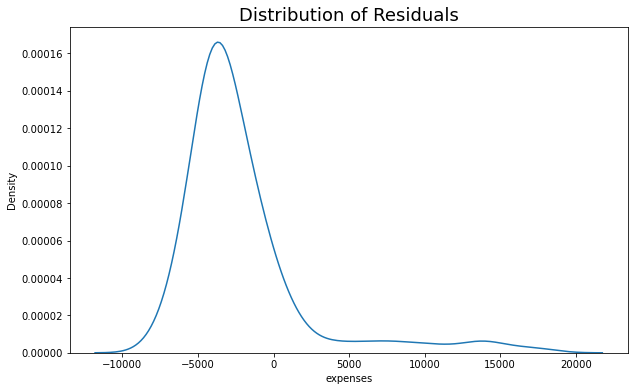

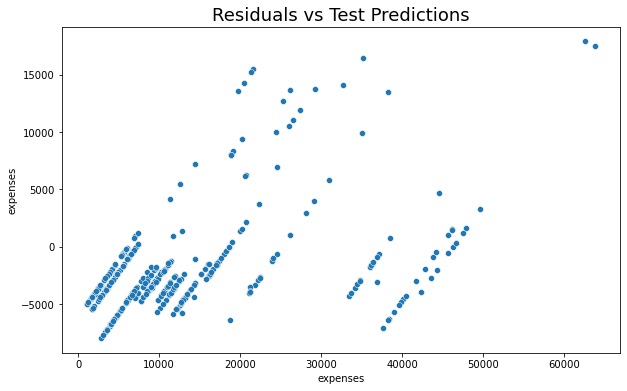

In [13]:
model = AdaBoostRegressor()

model.fit(X_train, y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('_ _'*11)

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

#Normality
plt.figure(figsize=(10,6))
sns.kdeplot(y_test-test_pred)
plt.title('Distribution of Residuals', fontsize = 18)
#errors are following the normality in residuals
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x = y_test, y = y_test-test_pred)
plt.title('Residuals vs Test Predictions', fontsize = 18)
#Residuals scatters around the zero
plt.show()

### XG Boost

Train MAE:  428.23042856069713
Train MSE:  574049.0271075722
Train RSME:  757.6602319691672
Train R2:  0.9961243740589504
_ __ __ __ __ __ __ __ __ __ __ _
Test MAE:  2840.763896842691
Test MSE:  23112028.64581517
Test RSME:  4807.497129049083
Test R2:  0.8382189641029492


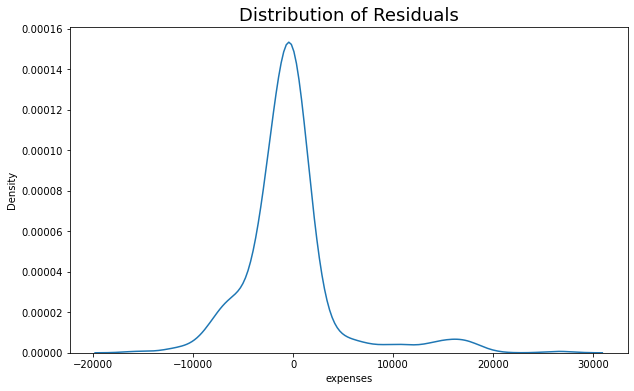

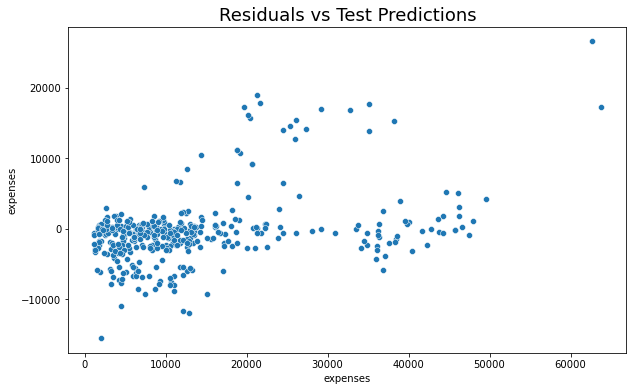

In [14]:
model = XGBRegressor()

model.fit(X_train, y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('_ _'*11)

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

#Normality
plt.figure(figsize=(10,6))
sns.kdeplot(y_test-test_pred)
plt.title('Distribution of Residuals', fontsize = 18)
#errors are following the normality in residuals
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x = y_test, y = y_test-test_pred)
plt.title('Residuals vs Test Predictions', fontsize = 18)
#Residuals scatters around the zero
plt.show()

### CatBoost 

Learning rate set to 0.038573
0:	learn: 11810.2200792	total: 58ms	remaining: 57.9s
1:	learn: 11488.2195505	total: 59.1ms	remaining: 29.5s
2:	learn: 11189.8244022	total: 61.3ms	remaining: 20.4s
3:	learn: 10874.3175751	total: 62.5ms	remaining: 15.6s
4:	learn: 10585.7322685	total: 63.6ms	remaining: 12.7s
5:	learn: 10311.0987368	total: 64.8ms	remaining: 10.7s
6:	learn: 10040.6140214	total: 65.5ms	remaining: 9.29s
7:	learn: 9785.9049621	total: 66.1ms	remaining: 8.2s
8:	learn: 9549.6158517	total: 67.3ms	remaining: 7.41s
9:	learn: 9319.4412660	total: 68.6ms	remaining: 6.79s
10:	learn: 9083.4313003	total: 69.7ms	remaining: 6.27s
11:	learn: 8849.4439825	total: 70.5ms	remaining: 5.8s
12:	learn: 8628.8201378	total: 71.3ms	remaining: 5.41s
13:	learn: 8430.3167695	total: 72.5ms	remaining: 5.1s
14:	learn: 8252.2440590	total: 73.7ms	remaining: 4.84s
15:	learn: 8091.7547744	total: 74.8ms	remaining: 4.6s
16:	learn: 7936.0605802	total: 76ms	remaining: 4.39s
17:	learn: 7766.9501093	total: 77.1ms	remainin

194:	learn: 4051.3371072	total: 329ms	remaining: 1.36s
195:	learn: 4048.4577295	total: 331ms	remaining: 1.36s
196:	learn: 4045.7900098	total: 333ms	remaining: 1.36s
197:	learn: 4042.8432128	total: 337ms	remaining: 1.37s
198:	learn: 4041.0667673	total: 341ms	remaining: 1.37s
199:	learn: 4038.0917157	total: 344ms	remaining: 1.37s
200:	learn: 4032.5828526	total: 345ms	remaining: 1.37s
201:	learn: 4029.6855828	total: 346ms	remaining: 1.37s
202:	learn: 4023.7832202	total: 347ms	remaining: 1.36s
203:	learn: 4020.5218826	total: 348ms	remaining: 1.36s
204:	learn: 4016.0514767	total: 350ms	remaining: 1.35s
205:	learn: 4014.9989134	total: 351ms	remaining: 1.35s
206:	learn: 4011.6378362	total: 352ms	remaining: 1.35s
207:	learn: 4008.8584587	total: 353ms	remaining: 1.34s
208:	learn: 4005.3638923	total: 355ms	remaining: 1.34s
209:	learn: 4002.4453855	total: 356ms	remaining: 1.34s
210:	learn: 3997.7174972	total: 357ms	remaining: 1.33s
211:	learn: 3995.3887784	total: 358ms	remaining: 1.33s
212:	learn

461:	learn: 3490.9204301	total: 664ms	remaining: 773ms
462:	learn: 3489.0004410	total: 666ms	remaining: 772ms
463:	learn: 3484.9911098	total: 667ms	remaining: 771ms
464:	learn: 3484.2019480	total: 669ms	remaining: 769ms
465:	learn: 3483.9662124	total: 670ms	remaining: 767ms
466:	learn: 3482.5145340	total: 671ms	remaining: 766ms
467:	learn: 3481.9233518	total: 672ms	remaining: 763ms
468:	learn: 3479.9206918	total: 673ms	remaining: 762ms
469:	learn: 3479.6968486	total: 674ms	remaining: 760ms
470:	learn: 3476.4087309	total: 675ms	remaining: 758ms
471:	learn: 3474.4785426	total: 676ms	remaining: 756ms
472:	learn: 3472.4700152	total: 677ms	remaining: 755ms
473:	learn: 3471.0605276	total: 679ms	remaining: 753ms
474:	learn: 3470.0808637	total: 679ms	remaining: 751ms
475:	learn: 3467.3037187	total: 681ms	remaining: 750ms
476:	learn: 3467.0447004	total: 682ms	remaining: 748ms
477:	learn: 3465.3341272	total: 683ms	remaining: 746ms
478:	learn: 3463.2878465	total: 684ms	remaining: 744ms
479:	learn

671:	learn: 3139.4665868	total: 984ms	remaining: 480ms
672:	learn: 3138.0443917	total: 986ms	remaining: 479ms
673:	learn: 3136.1567352	total: 988ms	remaining: 478ms
674:	learn: 3135.5150675	total: 989ms	remaining: 476ms
675:	learn: 3133.9113039	total: 990ms	remaining: 475ms
676:	learn: 3132.8721689	total: 992ms	remaining: 473ms
677:	learn: 3131.1444331	total: 993ms	remaining: 472ms
678:	learn: 3129.2423378	total: 996ms	remaining: 471ms
679:	learn: 3128.7704052	total: 997ms	remaining: 469ms
680:	learn: 3127.9502072	total: 998ms	remaining: 468ms
681:	learn: 3126.4490062	total: 999ms	remaining: 466ms
682:	learn: 3124.1382579	total: 1s	remaining: 464ms
683:	learn: 3123.3932738	total: 1s	remaining: 463ms
684:	learn: 3120.2893415	total: 1s	remaining: 461ms
685:	learn: 3119.1251067	total: 1s	remaining: 460ms
686:	learn: 3117.7814925	total: 1s	remaining: 458ms
687:	learn: 3116.4075584	total: 1.01s	remaining: 457ms
688:	learn: 3115.3749555	total: 1.01s	remaining: 455ms
689:	learn: 3114.5776119	

966:	learn: 2745.7256655	total: 1.32s	remaining: 45.1ms
967:	learn: 2744.7263939	total: 1.32s	remaining: 43.7ms
968:	learn: 2743.1317584	total: 1.32s	remaining: 42.3ms
969:	learn: 2741.1501117	total: 1.32s	remaining: 41ms
970:	learn: 2739.7135320	total: 1.32s	remaining: 39.6ms
971:	learn: 2738.6208569	total: 1.33s	remaining: 38.2ms
972:	learn: 2736.5940719	total: 1.33s	remaining: 36.9ms
973:	learn: 2735.5812745	total: 1.33s	remaining: 35.5ms
974:	learn: 2735.0286798	total: 1.33s	remaining: 34.1ms
975:	learn: 2730.6142058	total: 1.33s	remaining: 32.7ms
976:	learn: 2729.7410920	total: 1.33s	remaining: 31.4ms
977:	learn: 2727.8937694	total: 1.33s	remaining: 30ms
978:	learn: 2726.3180992	total: 1.33s	remaining: 28.6ms
979:	learn: 2725.9563688	total: 1.34s	remaining: 27.3ms
980:	learn: 2724.0433100	total: 1.34s	remaining: 25.9ms
981:	learn: 2723.3968787	total: 1.34s	remaining: 24.5ms
982:	learn: 2721.5143788	total: 1.34s	remaining: 23.2ms
983:	learn: 2718.8249271	total: 1.34s	remaining: 21.

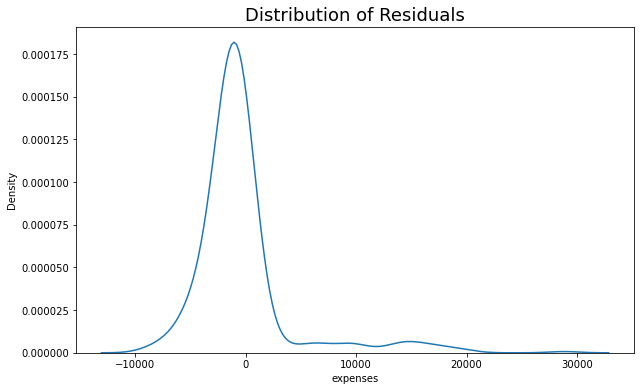

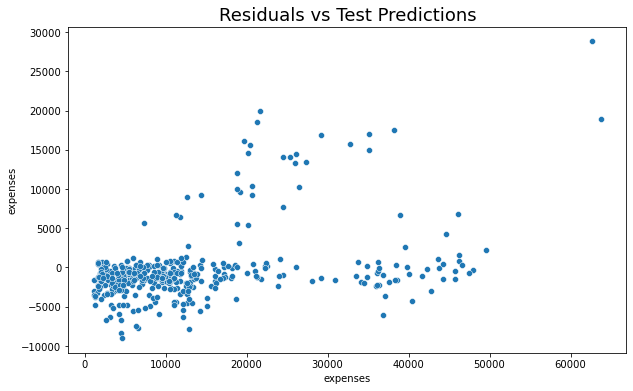

In [22]:
model = CatBoostRegressor()

model.fit(X_train, y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('_ _'*11)

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

#Normality
plt.figure(figsize=(10,6))
sns.kdeplot(y_test-test_pred)
plt.title('Distribution of Residuals', fontsize = 18)
#errors are following the normality in residuals
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x = y_test, y = y_test-test_pred)
plt.title('Residuals vs Test Predictions', fontsize = 18)
#Residuals scatters around the zero
plt.show()